In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import train_test_split

import xgboost as xgb



In [2]:
column = ["MPG", "Cylinders", "Displacement","Horsepower","Weight","Acceleration","Model_Year", "Origin"]
df = pd.read_csv("auto-mpg.data",names = column,na_values = "?", comment = "\t",sep = " ", skipinitialspace = True)
df_copy = df.copy()

In [3]:
df_copy.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
df1 = df_copy.rename(columns = {"MPG":"target"})

In [5]:
df1.head()


,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
df1.shape

(398, 8)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
describe = df1.describe()

In [9]:
# missing value
print(df1.isna().sum())

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64


In [10]:
df1["Horsepower"] = df1["Horsepower"].fillna(df1["Horsepower"].mean())

print(df1.isna().sum())



target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


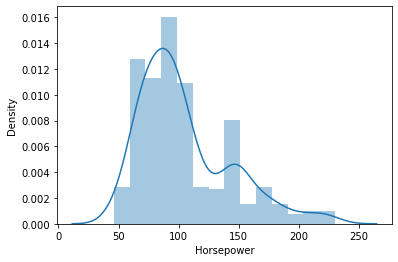

In [11]:
sns.distplot(df1.Horsepower);

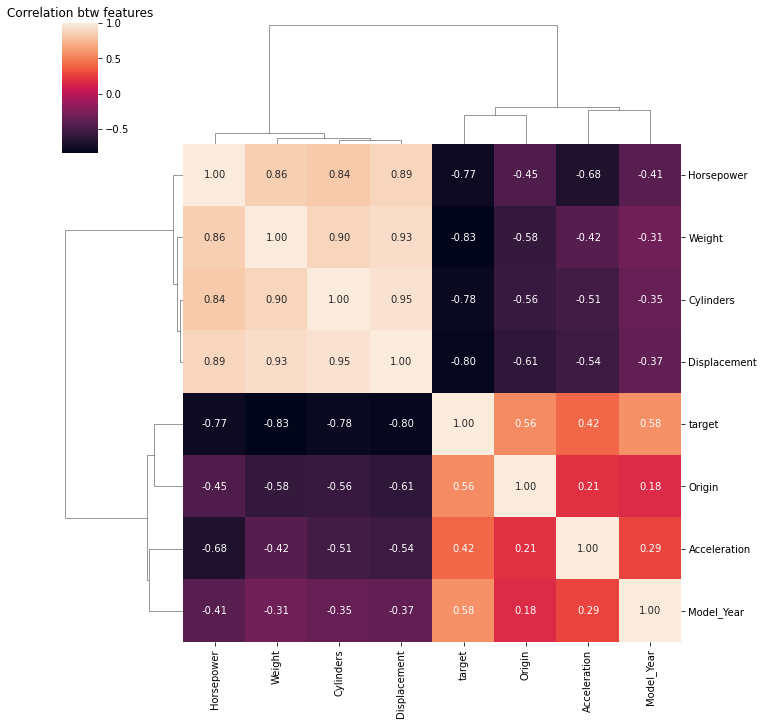

In [12]:
corr_matrix = df1.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation btw features");

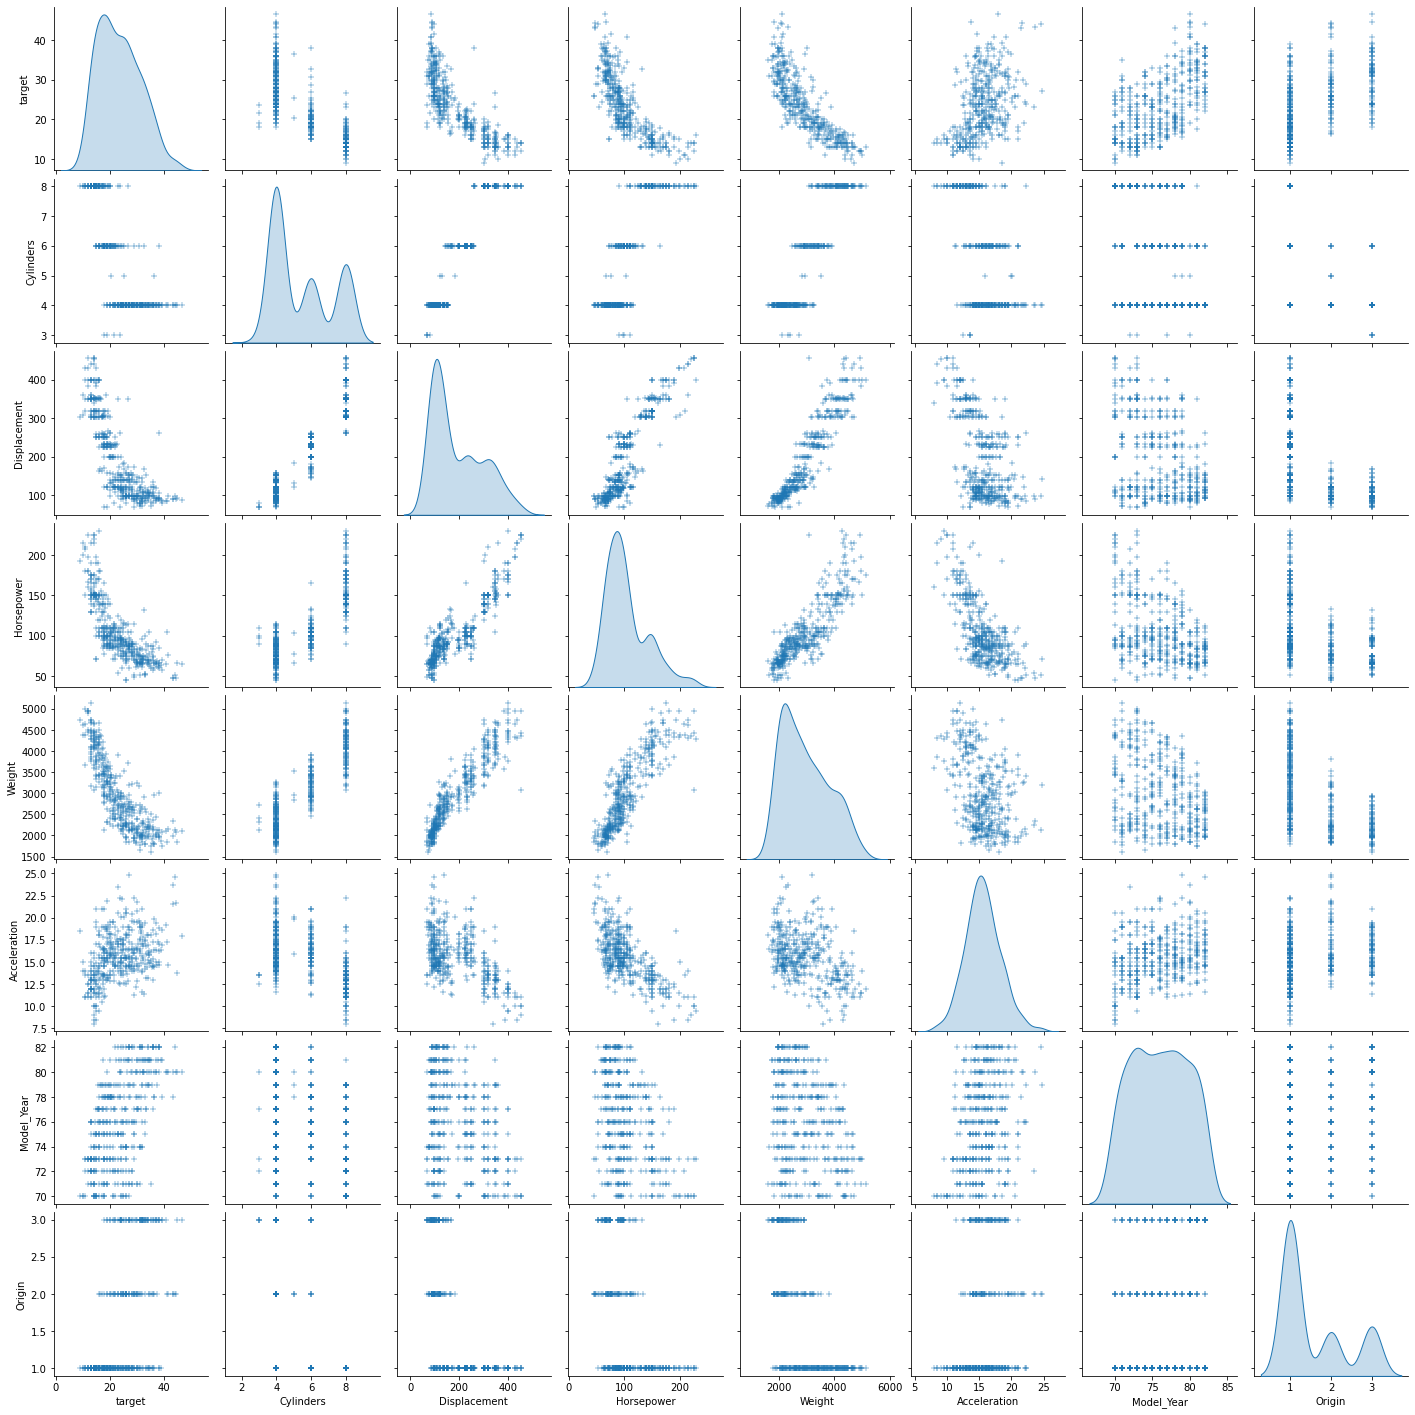

In [13]:
sns.pairplot(df1, diag_kind = "kde", markers = "+")
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    249
3     79
2     70
Name: Origin, dtype: int64


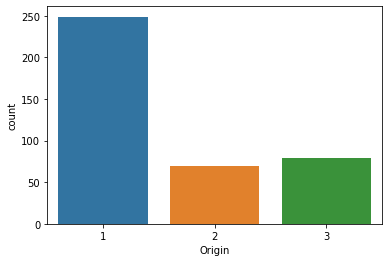

In [14]:
plt.figure()
sns.countplot(df1["Origin"])
print(df1["Origin"].value_counts())

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64


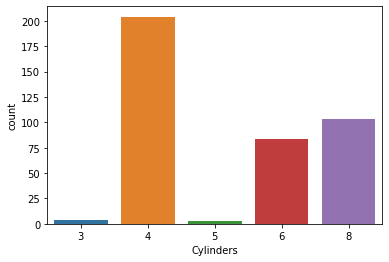

In [15]:
plt.figure()
sns.countplot(df1["Cylinders"])
print(df1["Cylinders"].value_counts())

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ASUS\anaconda3\lib\site-package

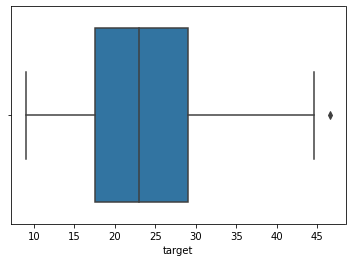

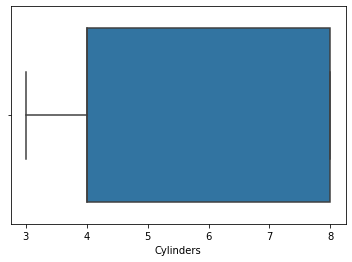

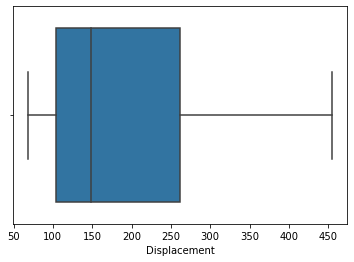

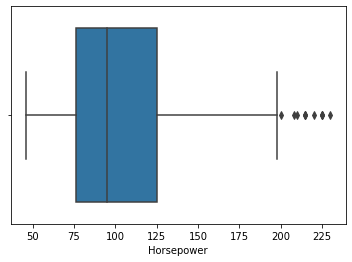

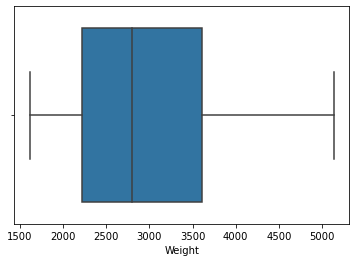

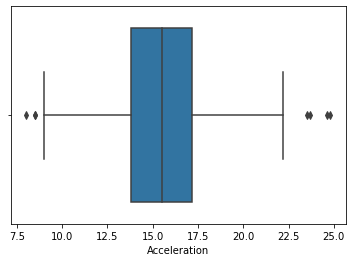

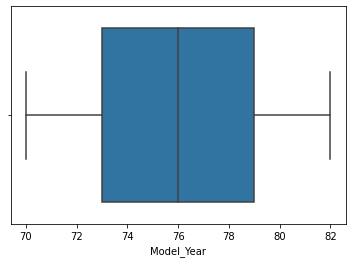

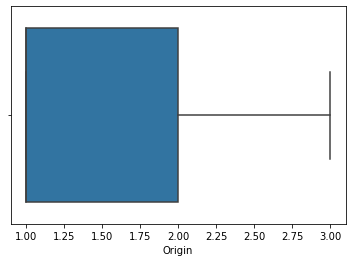

In [16]:
for c in df1.columns:
    plt.figure()
    sns.boxplot(x = c, data = df1, orient = "v")

In [17]:
thr = 2
horsepower_desc = describe["Horsepower"]
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = bottom_limit_hp < df1["Horsepower"]
filter_hp_top = df1["Horsepower"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top

df1 = df1[filter_hp]



In [18]:
acceleration_desc = describe["Acceleration"]
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc - q1_acc # q3 - q1
top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc
filter_acc_bottom = bottom_limit_acc < df1["Acceleration"]
filter_acc_top= df1["Acceleration"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top

df1 = df1[filter_acc]

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu: 23.472405063291134, sigma = 7.756119546409932


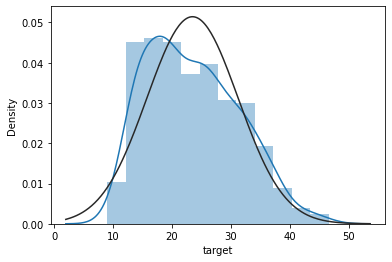

In [19]:
## target dependent variable

sns.distplot(df1.target, fit = norm)

(mu, sigma) = norm.fit(df1["target"])
print("mu: {}, sigma = {}".format(mu, sigma))

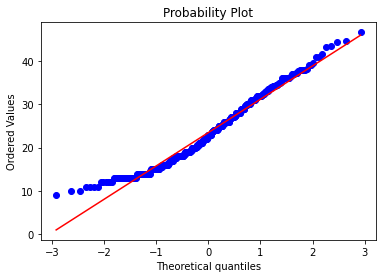

In [20]:
# qq plot
plt.figure()
stats.probplot(df1["target"], plot = plt);


In [21]:
df1["target"] = np.log1p(df1["target"]) 

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

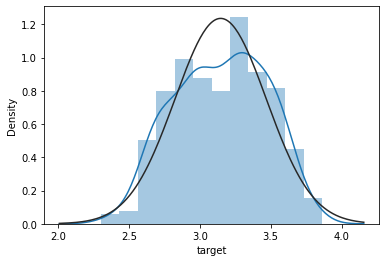

In [22]:
plt.figure()
sns.distplot(df1.target, fit = norm)

In [23]:
(mu, sigma) = norm.fit(df1["target"])
print("mu: {}, sigma = {}".format(mu, sigma))

mu: 3.146474056830183, sigma = 0.3227569103044823


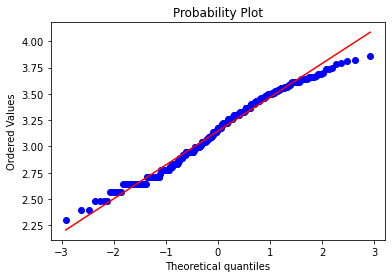

In [24]:
# qq plot
plt.figure()
stats.probplot(df1["target"], plot = plt)
plt.show()


In [25]:
# feature - independent variable 
skewed_feats = df1.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])


In [26]:
# one hot encoding
df1["Cylinders"] = df1["Cylinders"].astype(str)  
df1["Origin"] = df1["Origin"].astype(str) 
df1 = pd.get_dummies(df1)


In [27]:
# Split
x = df1.drop(["target"], axis = 1)
y = df1.target

In [28]:

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)


In [29]:
# Standardization
scaler = RobustScaler()  # RobustScaler #StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Regression Models

### Linear Regression

In [31]:
lm = LinearRegression()
model = lm.fit(X_train, Y_train)
print("LR Coef: ",lm.coef_)

LR Coef:  [ 0.06752459 -0.0934575  -0.29185551 -0.01799708  0.16751501 -0.18183911
  0.09700542  0.13760189 -0.03249221 -0.02027599 -0.04092822 -0.00486243
  0.04579066]


In [32]:
rmse = np.sqrt(mean_squared_error(Y_train, model.predict(X_train)))

In [33]:
rmse #eğitim hatası

0.10352904602229196

In [34]:
rmse_test = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))

In [35]:
rmse_test #test hatası

0.11575736325071176

In [36]:
mse = mean_squared_error(Y_test, model.predict(X_test))
print("Linear Regression MSE: ",mse)

Linear Regression MSE:  0.013399767146757233


In [37]:
#model.score(X_train,Y_train)

In [38]:
#cross_val_score(model, x, y, cv = 10, scoring = "r2").mean()

In [39]:
#np.sqrt(-cross_val_score(model, X_train, Y_train, cv = 10, scoring = "neg_mean_squared_error")).mean()

In [40]:
#np.sqrt(-cross_val_score(model, X_test, Y_test, cv = 10, scoring = "neg_mean_squared_error")).mean()

### Lasso Regression

In [41]:
lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)


In [42]:
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

In [58]:
gscv_lasso = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)
gscv_lasso.fit(X_train,Y_train)
scores = gscv_lasso.cv_results_['mean_test_score']
scores_std = gscv_lasso.cv_results_['std_test_score']

In [44]:
print("Lasso Coef: ",gscv_lasso.best_estimator_.coef_)
lasso = gscv_lasso.best_estimator_
print("Lasso Best Estimator: ",lasso)


Lasso Coef:  [ 0.05967309 -0.09184784 -0.28915117 -0.01757468  0.1673507  -0.1597757
  0.11216308  0.14197835 -0.01449547  0.         -0.03549399 -0.
  0.04927739]
Lasso Best Estimator:  Lasso(alpha=0.0001, max_iter=10000, random_state=42)


Lasso MSE:  0.013365437832352634
---------------------------------------------------------------


Text(0.5, 1.0, 'Lasso')

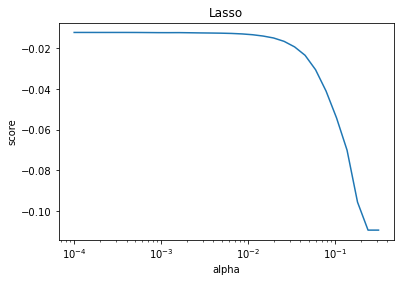

In [45]:
mse = mean_squared_error(Y_test,gscv_lasso.predict(X_test))
print("Lasso MSE: ",mse)
print("---------------------------------------------------------------")
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

In [46]:
rmse_test_lasso = np.sqrt(mean_squared_error(Y_test,gscv_lasso.predict(X_test)))

In [47]:
rmse_test_lasso #test hatası

0.11560898681483474

### XGBoost

In [48]:
parametersGrid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

model_xgb = xgb.XGBRegressor()


In [49]:
gscv = GridSearchCV(model_xgb, parametersGrid, cv = n_folds, scoring='neg_mean_squared_error', refit=True, n_jobs = 5, verbose=True)

In [50]:
gscv.fit(X_train, Y_train)
model_xgb = gscv.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[18:17:53] WARNING: d:\bld\xgboost-split_1631904903843\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:17:53] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [51]:
mse = mean_squared_error(Y_test,gscv.predict(X_test))
print("XGBRegressor MSE: ",mse)

XGBRegressor MSE:  0.008581430508310813


In [52]:
rmse_test_xgb = np.sqrt(mean_squared_error(Y_test, gscv.predict(X_test)))

In [53]:
rmse_test_xgb #test hatası

0.09263601086138594